In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('./dataset1.txt',names=['Exam 1', 'Exam 2', 'Admitted'])
train_df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [75]:
X = train_df[['Exam 1','Exam 2']]
Y = train_df['Admitted']

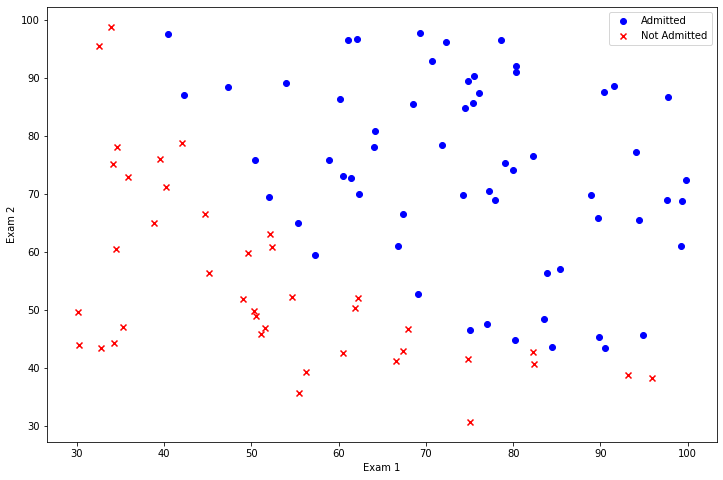

In [33]:
pos = X[Y==1]
neg = X[Y==0]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Exam 1'],
          pos['Exam 2'],
          c='b',
          marker='o',
          label='Admitted')
ax.scatter(neg['Exam 1'],
          neg['Exam 2'],
          c='r',
          marker='x',
          label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')
plt.show()

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [42]:
def log_loss(p,y):
    temp = np.multiply(y,np.log(p)) + np.multiply(1-y,np.log(1-p))
    return - np.sum(temp)

In [67]:
def gradient(x,y,w,eta,iters):
    costs = []
    for i in range(iters):
        h_x = sigmoid(x * w.T)
        cost = log_loss(h_x,y)
        costs.append(cost)
        for j in range(w.shape[1]):
            error = np.multiply(h_x - y,x[:,j])
            w[0,j] = w[0,j] - (eta/x.shape[0]) * np.sum(error)
    return w,costs                         

In [94]:
def gradient_re(x,y,w,eta,iters):
    costs = []
    for i in range(iters):
        h_x = sigmoid(x * w.T)
        cost = log_loss(h_x,y)
        costs.append(cost)
        for j in range(w.shape[1]):
            error = np.multiply(h_x - y,x[:,j])
            w[0,j] = w[0,j] * (1-eta/x.shape[0]) - (eta/x.shape[0]) * np.sum(error)
    return w,costs                         

In [44]:
def predict(w,x):
    preds = sigmoid(x * w.T)
    return [1 if pred >= 0.5 else 0 for pred in preds]

In [56]:
def acc(preds,y):
    right = 0
    for i in range(len(preds)):
        if preds[i] == y_train[i]:
            right += 1
    return right / y.shape[0]

In [76]:
# 归一化操作
X = (X - X.mean())/X.std()
X.insert(0,'ones',1)

x_train = np.matrix(X.values)
y_train = np.matrix(Y.values).reshape(-1,1)
w = np.matrix(np.zeros(x_train.shape[1]))

x_train.shape,y_train.shape,w.shape

((100, 3), (100, 1), (1, 3))

In [106]:
eta = 0.01
iters = 10000

In [82]:
w_new,costs = gradient(x_train,y_train,w,eta,iters)
w_new,costs[-1]

(matrix([[1.30305648, 3.12975905, 2.8904824 ]]), -20.946952312648758)

In [83]:
preds = predict(w_new,x_train)

In [84]:
acc(preds,y_train)

0.89

In [107]:
w_new,costs = gradient_re(x_train,y_train,w,eta,iters)
w_new,costs[-1]

(matrix([[0.89344849, 2.23889967, 2.0430464 ]]), -23.482404093470066)

In [108]:
preds = predict(w_new,x_train)
acc(preds,y_train)

0.89

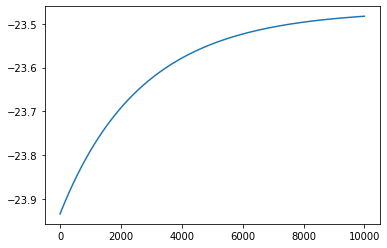

In [109]:
fig = plt.figure()
x = np.arange(0,iters,1)
plt.plot(x,costs)
plt.show()